In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the accident data into a Pandas DataFrame
df = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')

In [3]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.shape

(7728394, 46)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [7]:
df.dropna(inplace=True)
df.shape

(3554549, 46)

In [8]:
df['longitude']= df['End_Lng']-df['Start_Lng']
df['latitude']= df['End_Lat']-df['Start_Lat']
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,longitude,latitude
3402762,A-3412645,Source1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,...,False,False,False,False,Night,Night,Night,Night,0.060990,0.003150
3402767,A-3412650,Source1,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,...,False,False,False,False,Day,Day,Day,Day,-0.009006,-0.001917
3402771,A-3412654,Source1,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521,...,False,False,False,False,Day,Day,Day,Day,-0.001570,-0.007450
3402773,A-3412656,Source1,2,2016-02-08 15:16:43,2016-02-08 21:16:43,40.109310,-82.968490,40.110780,-82.984000,0.826,...,False,False,False,False,Day,Day,Day,Day,-0.015510,0.001470
3402774,A-3412657,Source1,2,2016-02-08 15:43:50,2016-02-08 21:43:50,39.192880,-84.477230,39.196150,-84.473350,0.307,...,False,False,False,False,Day,Day,Day,Day,0.003880,0.003270


In [9]:
df.drop(columns=['Start_Lng','Start_Lat','End_Lng','End_Lat'], inplace=True)
df.head()

,ID,Source,Severity,Start_Time,End_Time,Distance(mi),Description,Street,City,County,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,longitude,latitude
3402762,A-3412645,Source1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,Dublin,Franklin,...,False,False,False,False,Night,Night,Night,Night,0.060990,0.003150
3402767,A-3412650,Source1,3,2016-02-08 07:53:43,2016-02-08 13:53:43,0.500,At Mitchell Ave/Exit 6 - Accident.,I-75 S,Cincinnati,Hamilton,...,False,False,False,False,Day,Day,Day,Day,-0.009006,-0.001917
3402771,A-3412654,Source1,2,2016-02-08 11:51:46,2016-02-08 17:51:46,0.521,At Bagley Rd/Exit 235 - Accident.,I-71 S,Cleveland,Cuyahoga,...,False,False,False,False,Day,Day,Day,Day,-0.001570,-0.007450
3402773,A-3412656,Source1,2,2016-02-08 15:16:43,2016-02-08 21:16:43,0.826,At I-71/Exit 26 - Accident.,Outerbelt W,Westerville,Franklin,...,False,False,False,False,Day,Day,Day,Day,-0.015510,0.001470
3402774,A-3412657,Source1,2,2016-02-08 15:43:50,2016-02-08 21:43:50,0.307,At OH-4/Paddock Rd/Exit 9 - Accident.,I-75 N,Cincinnati,Hamilton,...,False,False,False,False,Day,Day,Day,Day,0.003880,0.003270


In [10]:
df[['sdate', 'stime']] = df['Start_Time'].str.split(' ', expand=True)
df[['edate', 'etime']] = df['End_Time'].str.split(' ', expand=True)

df.head()

,ID,Source,Severity,Start_Time,End_Time,Distance(mi),Description,Street,City,County,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,longitude,latitude,sdate,stime,edate,etime
3402762,A-3412645,Source1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,Dublin,Franklin,...,Night,Night,Night,Night,0.060990,0.003150,2016-02-08,00:37:08,2016-02-08,06:37:08
3402767,A-3412650,Source1,3,2016-02-08 07:53:43,2016-02-08 13:53:43,0.500,At Mitchell Ave/Exit 6 - Accident.,I-75 S,Cincinnati,Hamilton,...,Day,Day,Day,Day,-0.009006,-0.001917,2016-02-08,07:53:43,2016-02-08,13:53:43
3402771,A-3412654,Source1,2,2016-02-08 11:51:46,2016-02-08 17:51:46,0.521,At Bagley Rd/Exit 235 - Accident.,I-71 S,Cleveland,Cuyahoga,...,Day,Day,Day,Day,-0.001570,-0.007450,2016-02-08,11:51:46,2016-02-08,17:51:46
3402773,A-3412656,Source1,2,2016-02-08 15:16:43,2016-02-08 21:16:43,0.826,At I-71/Exit 26 - Accident.,Outerbelt W,Westerville,Franklin,...,Day,Day,Day,Day,-0.015510,0.001470,2016-02-08,15:16:43,2016-02-08,21:16:43
3402774,A-3412657,Source1,2,2016-02-08 15:43:50,2016-02-08 21:43:50,0.307,At OH-4/Paddock Rd/Exit 9 - Accident.,I-75 N,Cincinnati,Hamilton,...,Day,Day,Day,Day,0.003880,0.003270,2016-02-08,15:43:50,2016-02-08,21:43:50


In [11]:
# Convert the date column to datetime format
df['sdate'] = pd.to_datetime(df['sdate'])
df['edate'] = pd.to_datetime(df['edate'])

In [12]:
df['stime'] = pd.to_datetime(df['stime'])
df['etime'] = pd.to_datetime(df['etime'])

In [13]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Distance(mi),Description,Street,City,County,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,longitude,latitude,sdate,stime,edate,etime
3402762,A-3412645,Source1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,Dublin,Franklin,...,Night,Night,Night,Night,0.060990,0.003150,2016-02-08,2023-11-21 00:37:08,2016-02-08,2023-11-21 06:37:08
3402767,A-3412650,Source1,3,2016-02-08 07:53:43,2016-02-08 13:53:43,0.500,At Mitchell Ave/Exit 6 - Accident.,I-75 S,Cincinnati,Hamilton,...,Day,Day,Day,Day,-0.009006,-0.001917,2016-02-08,2023-11-21 07:53:43,2016-02-08,2023-11-21 13:53:43
3402771,A-3412654,Source1,2,2016-02-08 11:51:46,2016-02-08 17:51:46,0.521,At Bagley Rd/Exit 235 - Accident.,I-71 S,Cleveland,Cuyahoga,...,Day,Day,Day,Day,-0.001570,-0.007450,2016-02-08,2023-11-21 11:51:46,2016-02-08,2023-11-21 17:51:46
3402773,A-3412656,Source1,2,2016-02-08 15:16:43,2016-02-08 21:16:43,0.826,At I-71/Exit 26 - Accident.,Outerbelt W,Westerville,Franklin,...,Day,Day,Day,Day,-0.015510,0.001470,2016-02-08,2023-11-21 15:16:43,2016-02-08,2023-11-21 21:16:43
3402774,A-3412657,Source1,2,2016-02-08 15:43:50,2016-02-08 21:43:50,0.307,At OH-4/Paddock Rd/Exit 9 - Accident.,I-75 N,Cincinnati,Hamilton,...,Day,Day,Day,Day,0.003880,0.003270,2016-02-08,2023-11-21 15:43:50,2016-02-08,2023-11-21 21:43:50


## Analyze patterns related to road conditions, weather, and timezone

In [14]:
# Example 1: Accidents by road conditions
road_condition_counts = df['Street'].value_counts()
print(road_condition_counts)

Street
I-5 N                36694
I-95 N               36062
I-95 S               35293
I-5 S                31589
I-10 E               24387
                     ...  
Shanahan Rd              1
 Saint Michael Ln        1
 Dusty Trail Ln          1
Arboretum Dr             1
473-401 Cutoff Rd        1
Name: count, Length: 201909, dtype: int64


In [15]:
# Example 2: Accidents by weather conditions
weather_counts = df['Weather_Condition'].value_counts()
print(weather_counts)

Weather_Condition
Fair                                   1697787
Cloudy                                  524654
Mostly Cloudy                           457519
Partly Cloudy                           311743
Light Rain                              164310
                                        ...   
Heavy Sleet / Windy                          1
Heavy Ice Pellets                            1
Light Rain Shower / Windy                    1
Light Thunderstorms and Snow                 1
Heavy Thunderstorms with Small Hail          1
Name: count, Length: 122, dtype: int64


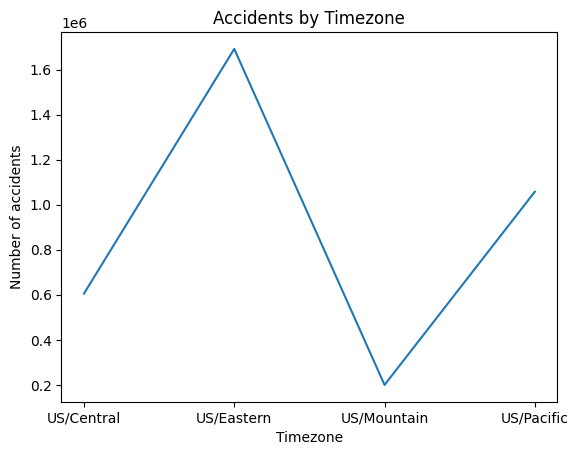

In [16]:
# Example 3: Accidents by timezone
hourly_counts = df['Timezone'].value_counts().sort_index()
plt.plot(hourly_counts.index, hourly_counts.values)
plt.xlabel('Timezone')
plt.ylabel('Number of accidents')
plt.title('Accidents by Timezone')
plt.show()

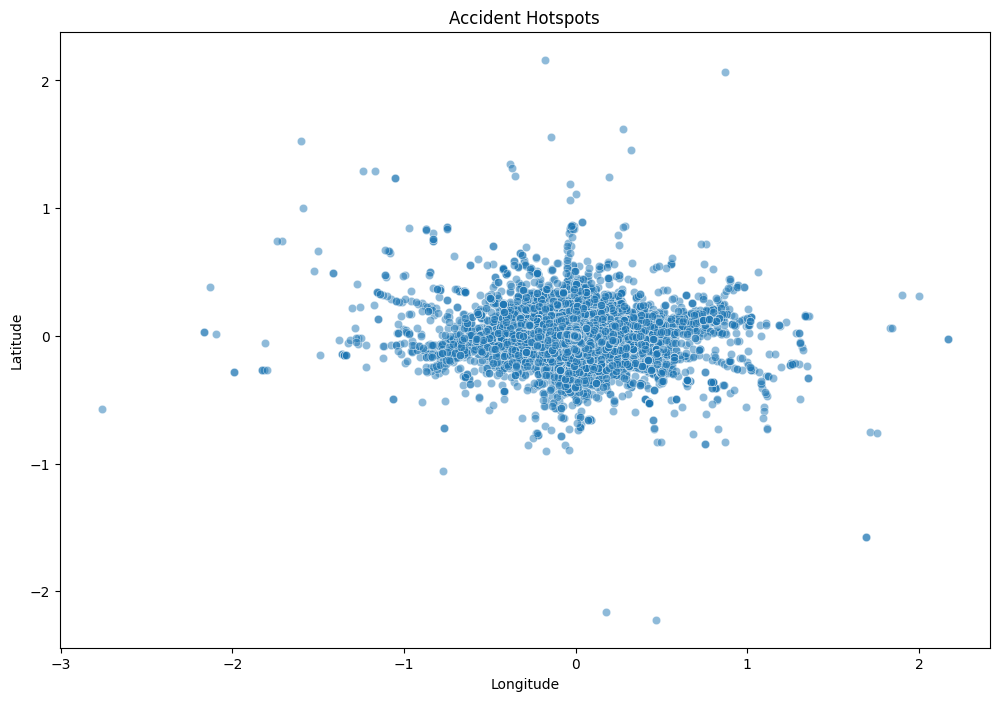

In [17]:
# Visualize accident hotspots on a map
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='longitude', y='latitude', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accident Hotspots')
plt.show()

<Axes: >

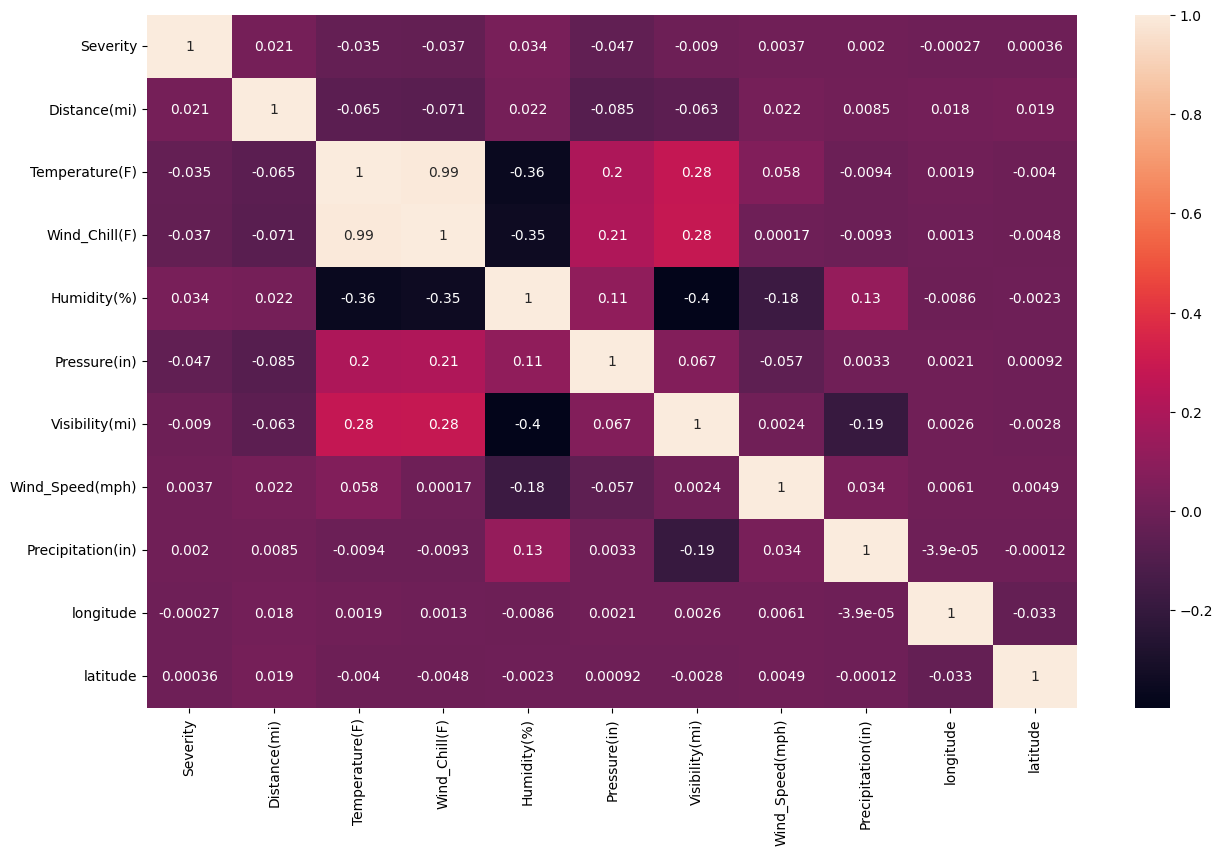

In [18]:
df_num=df.select_dtypes(np.number)

plt.figure(figsize=(15 ,9))
sns.heatmap(df_num.corr() , annot=True)

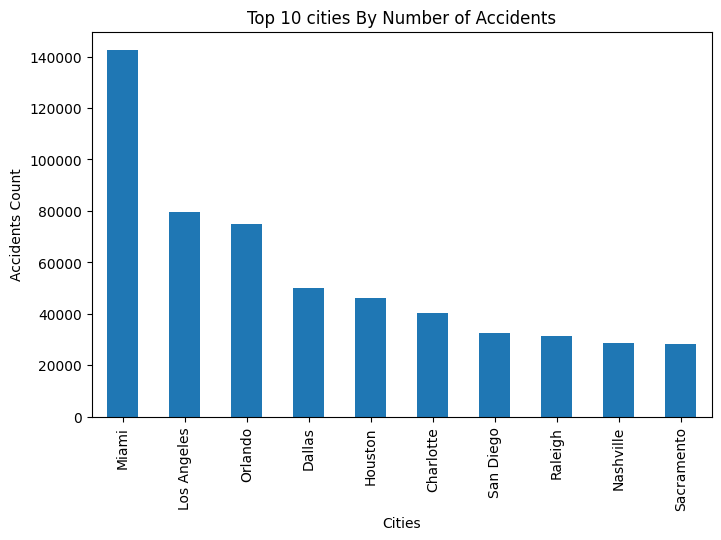

In [19]:
# top 10 cities by number of accident
accidents_by_cities = df['City'].value_counts()

fig, ax = plt.subplots(figsize=(8,5))
accidents_by_cities[:10].plot(kind='bar')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()

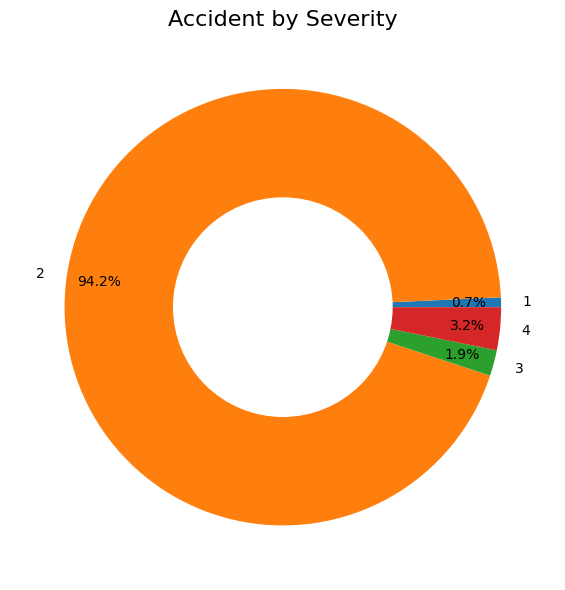

In [20]:
# Accident by Severity
accidents_severity = df.groupby('Severity').count()['ID']

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
label = [1,2,3,4]
plt.pie(accidents_severity, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accident by Severity",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()